In [61]:
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift

In [62]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [63]:
file = "All_ConsumptionSum.xlsx"

store_sum = pd.read_excel(file,sheet_name = 'Sheet1')

#인덱스 재설정, '업종' 출력
store_sum.columns=['num','연도','상권','업종','값']
#store_sum.drop('num',axis=1,inplace = True)

In [64]:
file = "All_ConsumptionRate.xlsx"

store_rate = pd.read_excel(file,sheet_name = 'Sheet1')

#인덱스 재설정, '업종' 출력
store_rate.columns=['num','연도','상권','업종','값']
#store_rate.drop('num',axis=1,inplace = True)

In [65]:
store_sum

,num,연도,상권,업종,값
0,0,2020,발달상권,컴퓨터및주변장치판매,38362266773
1,1,2020,발달상권,컴퓨터및주변장치판매,35284177853
2,2,2020,발달상권,수산물판매,29522251103
3,3,2020,발달상권,컴퓨터및주변장치판매,26935041548
4,4,2020,발달상권,컴퓨터및주변장치판매,26411589363
...,...,...,...,...,...
395,95,2020,발달상권,일반의류,6246738964
396,96,2020,골목상권,의료기기,6182710682
397,97,2020,전통시장,청과상,6175283483
398,98,2020,전통시장,청과상,6077563411


In [66]:
store_rate

,num,연도,상권,업종,값
0,0,2020,발달상권,커피-음료,1184669
1,1,2020,발달상권,편의점,1143049
2,2,2020,발달상권,일반의류,1105057
3,3,2020,발달상권,편의점,1090943
4,4,2020,발달상권,커피-음료,1071003
...,...,...,...,...,...
395,95,2020,발달상권,편의점,123292
396,96,2020,발달상권,편의점,122640
397,97,2020,발달상권,가전제품,122526
398,98,2020,관광특구,커피-음료,121710


# 매출금액과 그 횟수로 클러스터링

In [67]:
agg_format={'값':['sum','count']}
new_20=store_sum.iloc[:100,].groupby('업종').agg(agg_format)
new_20['연령']=20

new_30=store_sum.iloc[100:200,].groupby('업종').agg(agg_format)
new_30['연령']=30

new_40=store_sum.iloc[200:300,].groupby('업종').agg(agg_format)
new_40['연령']=40

new_50=store_sum.iloc[300:,].groupby('업종').agg(agg_format)
new_50['연령']=50

In [68]:
Sum = new_20.append(new_30).append(new_40).append(new_50)

In [69]:
Sum

값        연령
                     sum count    
업종                                
가전제품         21891747960     2  20
반찬가게         16114519735     2  20
수산물판매        50078779978     2  20
슈퍼마켓         10588766972     2  20
시계및귀금속       26976763385     4  20
...                  ...   ...  ..
조명용품         73453031242     7  50
청과상         133494097332    15  50
컴퓨터및주변장치판매  357666713337    12  50
한식음식점         6391052510     1  50
화장품          15782249164     2  50

[69 rows x 3 columns]

In [70]:
sum_kmeans=Sum.drop('연령',axis=1)

In [72]:
sum_kmeans

값      
                     sum count
업종                            
가전제품         21891747960     2
반찬가게         16114519735     2
수산물판매        50078779978     2
슈퍼마켓         10588766972     2
시계및귀금속       26976763385     4
...                  ...   ...
조명용품         73453031242     7
청과상         133494097332    15
컴퓨터및주변장치판매  357666713337    12
한식음식점         6391052510     1
화장품          15782249164     2

[69 rows x 2 columns]

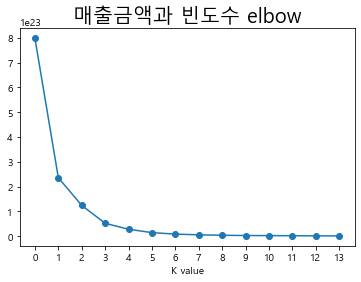

In [73]:
#print('Distortion : %.2f' % km.inertia)

distortions = []
for i in range(1,15):
    km = KMeans(n_clusters = i,init='k-means++',n_init=10, max_iter=300)
    km.fit(sum_kmeans)
    distortions.append(km.inertia_)

plt.plot(range(len(distortions)), distortions, marker='o')
ticks = plt.xticks(range(len(distortions)))
plt.xlabel('K value')
plt.title('매출금액과 빈도수 elbow',size=20)
plt.rcParams['figure.figsize']=[6,4]
plt.show()

In [76]:
kmeans=KMeans(n_clusters=3,init='k-means++',max_iter=300,random_state=0)
kmeans.fit(sum_kmeans)

KMeans(n_clusters=3, random_state=0)

In [77]:
print(kmeans.labels_)

[0 0 0 0 0 0 0 0 2 1 0 0 1 0 0 0 0 0 1 0 0 0 0 2 1 0 0 0 1 0 0 0 0 0 1 0 0
 0 0 0 0 0 1 0 0 0 0 2 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 1 2 0 0]


In [78]:
Sum['cluster']=kmeans.labels_
sum_kmeans['cluster']=kmeans.labels_

In [79]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(sum_kmeans)

sum_kmeans['pca_x'] = pca_transformed[:,0]
sum_kmeans['pca_y'] = pca_transformed[:,1]
sum_kmeans

값       cluster         pca_x     pca_y
                     sum count                                
업종                                                            
가전제품         21891747960     2       0 -6.366261e+10  1.077913
반찬가게         16114519735     2       0 -6.943984e+10  0.830717
수산물판매        50078779978     2       0 -3.547558e+10  2.283979
슈퍼마켓         10588766972     2       0 -7.496559e+10  0.594281
시계및귀금속       26976763385     4       0 -5.857759e+10 -0.704152
...                  ...   ...     ...           ...       ...
조명용품         73453031242     7       0 -1.210133e+10 -1.714989
청과상         133494097332    15       1  4.793974e+10 -7.163445
컴퓨터및주변장치판매  357666713337    12       2  2.721124e+11  5.408986
한식음식점         6391052510     1       0 -7.916330e+10  1.414490
화장품          15782249164     2       0 -6.977211e+10  0.816500

[69 rows x 5 columns]

In [80]:
Sum['pca_x'] = pca_transformed[:,0]
Sum['pca_y'] = pca_transformed[:,1]
Sum

값        연령 cluster         pca_x     pca_y
                     sum count                                    
업종                                                                
가전제품         21891747960     2  20       0 -6.366261e+10  1.077913
반찬가게         16114519735     2  20       0 -6.943984e+10  0.830717
수산물판매        50078779978     2  20       0 -3.547558e+10  2.283979
슈퍼마켓         10588766972     2  20       0 -7.496559e+10  0.594281
시계및귀금속       26976763385     4  20       0 -5.857759e+10 -0.704152
...                  ...   ...  ..     ...           ...       ...
조명용품         73453031242     7  50       0 -1.210133e+10 -1.714989
청과상         133494097332    15  50       1  4.793974e+10 -7.163445
컴퓨터및주변장치판매  357666713337    12  50       2  2.721124e+11  5.408986
한식음식점         6391052510     1  50       0 -7.916330e+10  1.414490
화장품          15782249164     2  50       0 -6.977211e+10  0.816500

[69 rows x 6 columns]

In [81]:
Sum=Sum.reset_index()

In [82]:
Sum

업종             값        연령 cluster         pca_x     pca_y
                         sum count                                    
0         가전제품   21891747960     2  20       0 -6.366261e+10  1.077913
1         반찬가게   16114519735     2  20       0 -6.943984e+10  0.830717
2        수산물판매   50078779978     2  20       0 -3.547558e+10  2.283979
3         슈퍼마켓   10588766972     2  20       0 -7.496559e+10  0.594281
4       시계및귀금속   26976763385     4  20       0 -5.857759e+10 -0.704152
..         ...           ...   ...  ..     ...           ...       ...
64        조명용품   73453031242     7  50       0 -1.210133e+10 -1.714989
65         청과상  133494097332    15  50       1  4.793974e+10 -7.163445
66  컴퓨터및주변장치판매  357666713337    12  50       2  2.721124e+11  5.408986
67       한식음식점    6391052510     1  50       0 -7.916330e+10  1.414490
68         화장품   15782249164     2  50       0 -6.977211e+10  0.816500

[69 rows x 7 columns]

C:\Users\aspyo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\aspyo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


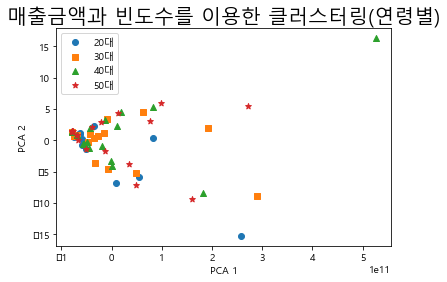

In [83]:
#군집 값이 0,1,2인경우마다 별도의 인덱스로 추출
marker0_ind = Sum[Sum['연령']==20].index
marker1_ind= Sum[Sum['연령']==30].index
marker2_ind =Sum[Sum['연령']==40].index
marker3_ind = Sum[Sum['연령']==50].index

#marker4_ind = seoul_20[seoul_20['cluster']==4].index

#군집값 0,1,2에 해당하는 인덱스로 각 군집 레벨의 pca_x,pca_y값추출 o,s,^로 마커표시
plt.scatter(x=Sum.loc[marker0_ind,'pca_x'],y=Sum.loc[marker0_ind,'pca_y'],marker='o',label='20대')
plt.scatter(x=Sum.loc[marker1_ind,'pca_x'],y=Sum.loc[marker1_ind,'pca_y'],marker='s',label='30대')
plt.scatter(x=Sum.loc[marker2_ind,'pca_x'],y=Sum.loc[marker2_ind,'pca_y'],marker='^',label='40대')
plt.scatter(x=Sum.loc[marker3_ind,'pca_x'],y=Sum.loc[marker3_ind,'pca_y'],marker='*',label='50대')
#plt.scatter(x=seoul_20.loc[marker4_ind,'pca_x'],y=seoul_20.loc[marker4_ind,'pca_y'],marker='x')

plt.rcParams['figure.figsize']=[10,8]
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('매출금액과 빈도수를 이용한 클러스터링(연령별)',size=20)
plt.legend()
plt.show()

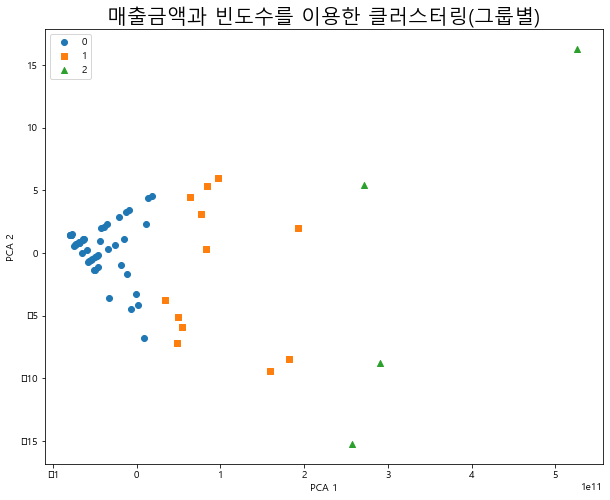

In [84]:
#군집 값이 0,1,2인경우마다 별도의 인덱스로 추출
marker0_ind = Sum[Sum['cluster']==0].index
marker1_ind= Sum[Sum['cluster']==1].index
marker2_ind = Sum[Sum['cluster']==2].index
#marker3_ind =  Sum[Sum['cluster']==3].index

#marker4_ind = seoul_20[seoul_20['cluster']==4].index

#군집값 0,1,2에 해당하는 인덱스로 각 군집 레벨의 pca_x,pca_y값추출 o,s,^로 마커표시
plt.scatter(x=Sum.loc[marker0_ind,'pca_x'],y=Sum.loc[marker0_ind,'pca_y'],marker='o',label='0')
plt.scatter(x=Sum.loc[marker1_ind,'pca_x'],y=Sum.loc[marker1_ind,'pca_y'],marker='s',label='1')
plt.scatter(x=Sum.loc[marker2_ind,'pca_x'],y=Sum.loc[marker2_ind,'pca_y'],marker='^',label='2')
#plt.scatter(x=Sum.loc[marker3_ind,'pca_x'],y=Sum.loc[marker3_ind,'pca_y'],marker='*',label='3')
#plt.scatter(x=seoul_20.loc[marker4_ind,'pca_x'],y=seoul_20.loc[marker4_ind,'pca_y'],marker='x')

plt.rcParams['figure.figsize']=[10,8]
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('매출금액과 빈도수를 이용한 클러스터링(그룹별)',size=20)
plt.legend()
plt.show()

In [85]:
Sum[Sum['cluster']==0]

업종             값        연령 cluster         pca_x     pca_y
                      sum count                                    
0      가전제품   21891747960     2  20       0 -6.366261e+10  1.077913
1      반찬가게   16114519735     2  20       0 -6.943984e+10  0.830717
2     수산물판매   50078779978     2  20       0 -3.547558e+10  2.283979
3      슈퍼마켓   10588766972     2  20       0 -7.496559e+10  0.594281
4    시계및귀금속   26976763385     4  20       0 -5.857759e+10 -0.704152
5        신발   13087829799     2  20       0 -7.246653e+10  0.701211
6     양식음식점   12609287079     2  20       0 -7.294507e+10  0.680735
7      의료기기   21564792091     2  20       0 -6.398957e+10  1.063923
10   전자상거래업   38631045434     4  20       0 -4.692331e+10 -0.205489
11    커피-음료   25911840373     3  20       0 -5.964252e+10  0.250103
13    한식음식점   94429570767    13  20       0  8.875214e+09 -6.816371
14  호프-간이주점   22578748195     2  20       0 -6.297561e+10  1.107308
15      화장품   34646366406     5  20       0 -5.090799e+10 -1.375806
16     가전제품   76098769246     2  30       0 -9.455588e+09  3.397321
17     반찬가게   69840118656     4  30       0 -1.571424e+10  1.129884
19   시계및귀금속   42137912774     3  30       0 -4.341644e+10  0.944384
20       신발    6097024438     1  30       0 -7.945733e+10  1.401909
21  운동/경기용품   11271903165     2  30       0 -7.428245e+10  0.623511
22     육류판매   59083014902     4  30       0 -2.647134e+10  0.669610
25   전자상거래업   39096840674     4  30       0 -4.645752e+10 -0.185558
26     조명용품   16174151233     2  30       0 -6.938021e+10  0.833268
27      청과상   50942779045     4  30       0 -3.461158e+10  0.321305
29    한식음식점   52637566249     8  30       0 -3.291679e+10 -3.605462
30      화장품   78277872421    10  30       0 -7.276485e+09 -4.508007
31     가전제품  103840684009     2  40       0  1.828633e+10  4.584341
32       문구   35835467350     4  40       0 -4.971889e+10 -0.325106
33     반찬가게   72338886510     2  40       0 -1.321547e+10  3.236443
35   시계및귀금속   42805544557     2  40       0 -4.274881e+10  1.972772
36    외국어학원    6751922982     1  40       0 -7.880243e+10  1.429931
37  운동/경기용품   16106016015     2  40       0 -6.944834e+10  0.830353
38     육류판매   96731183708     4  40       0  1.117683e+10  2.280498
39     의료기기   87376134302    10  40       0  1.821777e+09 -4.118711
40      의약품    6227716218     1  40       0 -7.932664e+10  1.407501
41   일반교습학원   31569384999     4  40       0 -5.398497e+10 -0.507643
43     일반의원   84378862876     9  40       0 -1.175494e+09 -3.247137
44   전자상거래업   30493498194     4  40       0 -5.506086e+10 -0.553678
45     조명용품   67366090606     6  40       0 -1.818827e+10 -0.975616
46      청과상   28082268772     4  40       0 -5.747209e+10 -0.656849
48    한식음식점   16286471581     2  40       0 -6.926789e+10  0.838074
49      화장품   39725187392     5  40       0 -4.582917e+10 -1.158493
50       가구    7963137447     1  50       0 -7.759122e+10  1.481757
51     가전제품   99200848299     2  50       0  1.364649e+10  4.385812
52     반찬가게   64531340491     2  50       0 -2.102302e+10  2.902374
53     섬유제품    6859104133     1  50       0 -7.869525e+10  1.434517
55   시계및귀금속   45920059110     2  50       0 -3.963430e+10  2.106035
56  운동/경기용품   17683871886     2  50       0 -6.787049e+10  0.897866
58     의료기기   35580717117     5  50       0 -4.997364e+10 -1.335827
59      의약품    7571744139     1  50       0 -7.798261e+10  1.465010
60   일반교습학원    7235940623     1  50       0 -7.831842e+10  1.450641
63   전자상거래업   19721776389     3  50       0 -6.583258e+10 -0.014757
64     조명용품   73453031242     7  50       0 -1.210133e+10 -1.714989
67    한식음식점    6391052510     1  50       0 -7.916330e+10  1.414490
68      화장품   15782249164     2  50       0 -6.977211e+10  0.816500

In [86]:
Sum[Sum['cluster']==1]

업종             값        연령 cluster         pca_x     pca_y
                         sum count                                    
9         일반의원  140197754301    14  20       1  5.464340e+10 -5.876788
12  컴퓨터및주변장치판매  168553111854     9  20       1  8.299875e+10  0.335585
18       수산물판매  148982917073     4  30       1  6.342856e+10  4.497321
24        일반의원  134387325406    13  30       1  4.883297e+10 -5.125583
28  컴퓨터및주변장치판매  278162081497    12  30       1  1.926077e+11  2.026068
34       수산물판매  169057155391     4  40       1  8.350280e+10  5.356257
42        일반의류  266976553466    22  40       1  1.814222e+11 -8.450748
54       수산물판매  183128835451     4  50       1  9.757448e+10  5.958355
57        육류판매  162897218995     6  50       1  7.734286e+10  3.093044
61        일반의류  245160018866    22  50       1  1.596057e+11 -9.384233
62        일반의원  119500701109    11  50       1  3.394634e+10 -3.762910
65         청과상  133494097332    15  50       1  4.793974e+10 -7.163445

In [87]:
Sum[Sum['cluster']==2]

업종             값        연령 cluster         pca_x      pca_y
                         sum count                                     
8         일반의류  342334323588    32  20       2  2.567800e+11 -15.243474
23        일반의류  376032249210    27  30       2  2.904779e+11  -8.802504
47  컴퓨터및주변장치판매  612141380513    12  40       2  5.265870e+11  16.297441
66  컴퓨터및주변장치판매  357666713337    12  50       2  2.721124e+11   5.408986

# 매출건수와 빈도수로 클러스터링

In [89]:
agg_format={'값':['sum','count']}
new_20=store_rate.iloc[:100,].groupby('업종').agg(agg_format)
new_20['연령']=20

new_30=store_rate.iloc[100:200,].groupby('업종').agg(agg_format)
new_30['연령']=30

new_40=store_rate.iloc[200:300,].groupby('업종').agg(agg_format)
new_40['연령']=40

new_50=store_rate.iloc[300:,].groupby('업종').agg(agg_format)
new_50['연령']=50

In [90]:
new_20

값        연령
                 sum count    
업종                            
PC방          2854533     6  20
반찬가게         2093705     4  20
수산물판매         795888     2  20
슈퍼마켓         1446592     4  20
일반의류         5435986     8  20
전자상거래업       3168992     4  20
제과점          1283482     2  20
커피-음료       11005737    20  20
컴퓨터및주변장치판매    709591     1  20
편의점         23234199    44  20
한식음식점        1499604     4  20
호프-간이주점       425855     1  20

In [91]:
Rate= new_20.append(new_30).append(new_40).append(new_50)

In [92]:
len(Rate)

56

In [93]:
rate_kmeans=Rate.drop('연령',axis=1)

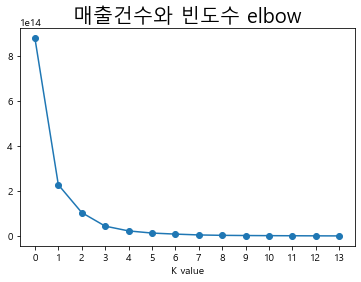

In [98]:
#print('Distortion : %.2f' % km.inertia)

distortions = []
for i in range(1,15):
    km = KMeans(n_clusters = i,init='k-means++',n_init=10, max_iter=300)
    km.fit(rate_kmeans)
    distortions.append(km.inertia_)

plt.plot(range(len(distortions)), distortions, marker='o')
ticks = plt.xticks(range(len(distortions)))
plt.xlabel('K value')
plt.title('매출건수와 빈도수 elbow',size=20)
plt.rcParams['figure.figsize']=[6,4]
plt.show()

In [99]:
kmeans=KMeans(n_clusters=3,init='k-means++',max_iter=300,random_state=0)
kmeans.fit(rate_means)

KMeans(n_clusters=3, random_state=0)

In [100]:
print(kmeans.labels_)

[0 0 0 0 2 0 0 2 0 1 0 0 0 0 0 0 0 0 0 0 2 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 2
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [101]:
Rate['cluster']=kmeans.labels_
rate_kmeans['cluster']=kmeans.labels_

In [102]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(rate_kmeans)

rate_kmeans['pca_x'] = pca_transformed[:,0]
rate_kmeans['pca_y'] = pca_transformed[:,1]
rate_kmeans.head(3)

값       cluster         pca_x     pca_y
           sum count                                
업종                                                  
PC방    2854533     6       0  2.070428e+05 -1.589405
반찬가게   2093705     4       0 -5.537852e+05 -1.959008
수산물판매   795888     2       0 -1.851602e+06 -1.178101

In [103]:
Rate['pca_x'] = pca_transformed[:,0]
Rate['pca_y'] = pca_transformed[:,1]
Rate.head(3)

값        연령 cluster         pca_x     pca_y
           sum count                                    
업종                                                      
PC방    2854533     6  20       0  2.070428e+05 -1.589405
반찬가게   2093705     4  20       0 -5.537852e+05 -1.959008
수산물판매   795888     2  20       0 -1.851602e+06 -1.178101

In [104]:
Rate=Rate.reset_index()

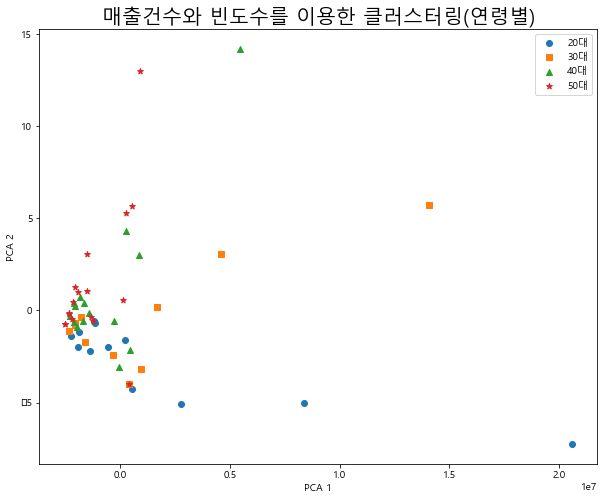

In [107]:
#군집 값이 0,1,2인경우마다 별도의 인덱스로 추출
marker0_ind = Rate[Rate['연령']==20].index
marker1_ind= Rate[Rate['연령']==30].index
marker2_ind =Rate[Rate['연령']==40].index
marker3_ind = Rate[Rate['연령']==50].index

#marker4_ind = seoul_20[seoul_20['cluster']==4].index

#군집값 0,1,2에 해당하는 인덱스로 각 군집 레벨의 pca_x,pca_y값추출 o,s,^로 마커표시
plt.scatter(x=Rate.loc[marker0_ind,'pca_x'],y=Rate.loc[marker0_ind,'pca_y'],marker='o',label='20대')
plt.scatter(x=Rate.loc[marker1_ind,'pca_x'],y=Rate.loc[marker1_ind,'pca_y'],marker='s',label='30대')
plt.scatter(x=Rate.loc[marker2_ind,'pca_x'],y=Rate.loc[marker2_ind,'pca_y'],marker='^',label='40대')
plt.scatter(x=Rate.loc[marker3_ind,'pca_x'],y=Rate.loc[marker3_ind,'pca_y'],marker='*',label='50대')
#plt.scatter(x=seoul_20.loc[marker4_ind,'pca_x'],y=seoul_20.loc[marker4_ind,'pca_y'],marker='x')

plt.rcParams['figure.figsize']=[10,8]
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('매출건수와 빈도수를 이용한 클러스터링(연령별)',size=20)
plt.legend()
plt.show()

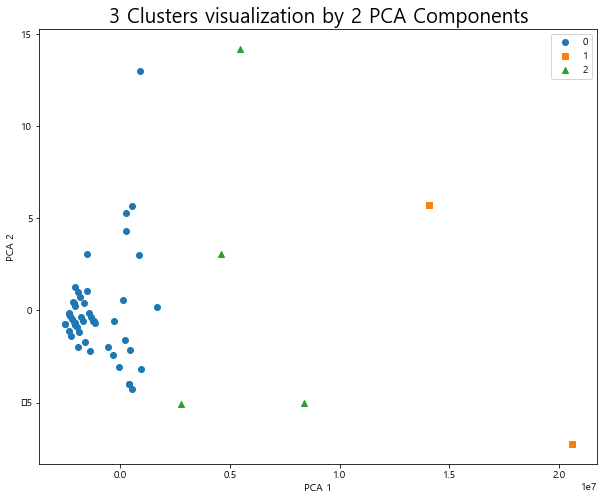

In [108]:
#군집 값이 0,1,2인경우마다 별도의 인덱스로 추출
marker0_ind = Rate[Rate['cluster']==0].index
marker1_ind= Rate[Rate['cluster']==1].index
marker2_ind = Rate[Rate['cluster']==2].index
#marker3_ind =  Rate[Rate['cluster']==3].index

#marker4_ind = seoul_20[seoul_20['cluster']==4].index

#군집값 0,1,2에 해당하는 인덱스로 각 군집 레벨의 pca_x,pca_y값추출 o,s,^로 마커표시
plt.scatter(x=Rate.loc[marker0_ind,'pca_x'],y=Rate.loc[marker0_ind,'pca_y'],marker='o',label='0')
plt.scatter(x=Rate.loc[marker1_ind,'pca_x'],y=Rate.loc[marker1_ind,'pca_y'],marker='s',label='1')
plt.scatter(x=Rate.loc[marker2_ind,'pca_x'],y=Rate.loc[marker2_ind,'pca_y'],marker='^',label='2')
#plt.scatter(x=Rate.loc[marker3_ind,'pca_x'],y=Rate.loc[marker3_ind,'pca_y'],marker='*',label='3')
#plt.scatter(x=seoul_20.loc[marker4_ind,'pca_x'],y=seoul_20.loc[marker4_ind,'pca_y'],marker='x')

plt.rcParams['figure.figsize']=[10,8]
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Clusters visualization by 2 PCA Components',size=20)
plt.legend()
plt.show()